"""
Nom:Brayan Dyvan Lando && Fanta HAdizatou Momo
Lab:TP3
Cours:Intelligence artificielle
"""

Importation des librairies

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from NaifBayesGaussien import GaussianNaiveBayes
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import category_encoders as ce
import numpy as np
import re
import heapq
import warnings

warnings.filterwarnings('ignore')

#Etape1 : Collectes des donnnés

In [2]:

df = pd.read_csv('train.csv')

#Afficher le dataframe 
print(df.head)


<bound method NDFrame.head of             ID Customer_ID     Month           Name   Age          SSN  \
0       0x1602   CUS_0xd40   January  Aaron Maashoh    23  821-00-0265   
1       0x1603   CUS_0xd40  February  Aaron Maashoh    23  821-00-0265   
2       0x1604   CUS_0xd40     March  Aaron Maashoh  -500  821-00-0265   
3       0x1605   CUS_0xd40     April  Aaron Maashoh    23  821-00-0265   
4       0x1606   CUS_0xd40       May  Aaron Maashoh    23  821-00-0265   
...        ...         ...       ...            ...   ...          ...   
99995  0x25fe9  CUS_0x942c     April          Nicks    25  078-73-5990   
99996  0x25fea  CUS_0x942c       May          Nicks    25  078-73-5990   
99997  0x25feb  CUS_0x942c      June          Nicks    25  078-73-5990   
99998  0x25fec  CUS_0x942c      July          Nicks    25  078-73-5990   
99999  0x25fed  CUS_0x942c    August          Nicks    25  078-73-5990   

      Occupation Annual_Income  Monthly_Inhand_Salary  Num_Bank_Accounts  ...  \


#Étape2 : Prétraitement essentiel et optionnelles si besoin

In [3]:
#Exploration des données

#Affichage des types de données  et des counts
print("....................Type de donnée pour l'application de l'encodage")
df.info()
print(df.head(100))



....................Type de donnée pour l'application de l'encodage
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 

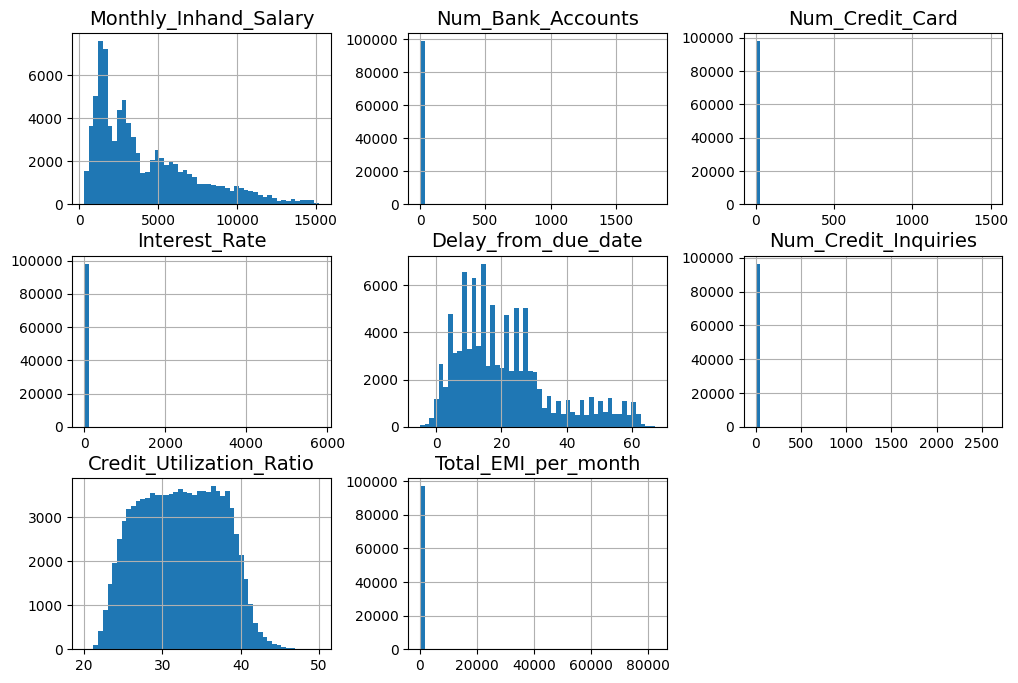

In [4]:
plt.rc('font',size=14)
plt.rc('axes',labelsize=14,titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50,figsize=(12,8))
plt.show()

In [5]:
#Préparation

#On regroupe les données sur les clients pour qu'ils soient uniques

#Mois

filtered_df = df.groupby('Customer_ID')['Month'].unique() #Les clients et les mois de la côte de credit doivent etre unique

print( all(filtered_df.apply(lambda x: set(x) == set(filtered_df.iloc[0])))) #Les clients ont tous les mêmes mois 






True


In [6]:

def replaceAll(x): # Fonction qui permet de remplacer les éléments nulls par l' élement le plus
    #récurrent du client qui peut remplacer celui-là
    df[x] = df.groupby('Customer_ID')[x].transform(lambda x: x.fillna(x.mode()[0])) 

def valueBasHaut (x): # Fonction qui permet de remplacer les éléments nulls par l' élement qu'il faut en comparent
    #l'élement de la prochaine ligne et celui de la lgne précédente
    df[x] = df.groupby('Customer_ID')[x].transform(lambda x: x.ffill().bfill()) 
    
def convertInt (x):
    df[x] = df[x].str.strip("_") #retirer les underscore

    df[x] = pd.to_numeric(df[x], downcast="integer") # transformer en entier 
def convertFloat (x):
    df[x] = df[x].str.strip("_") #retirer les underscore

    df[x] = pd.to_numeric(df[x], downcast="float") # transformer en float 

In [7]:

    
#Nom 

print( df.groupby('Customer_ID').count()) # On compte le nombre de données de clients identiques 
print(df['Name'].isna().sum()) # Le nombre de lignes de nom null

replaceAll('Name')# On remplace le nom du 
#client par le nom le plus récurent parce que chaque client dispose de 8 mois de données donc 8 nom identique



print( all(df.groupby('Customer_ID')['Name'].count() == 8) ) # on vérifie que le regroupement des données du client a été bien exécuuté

             ID  Month  Name  Age  SSN  Occupation  Annual_Income  \
Customer_ID                                                         
CUS_0x1000    8      8     7    8    8           8              8   
CUS_0x1009    8      8     8    8    8           8              8   
CUS_0x100b    8      8     7    8    8           8              8   
CUS_0x1011    8      8     8    8    8           8              8   
CUS_0x1013    8      8     8    8    8           8              8   
...          ..    ...   ...  ...  ...         ...            ...   
CUS_0xff3     8      8     6    8    8           8              8   
CUS_0xff4     8      8     7    8    8           8              8   
CUS_0xff6     8      8     8    8    8           8              8   
CUS_0xffc     8      8     8    8    8           8              8   
CUS_0xffd     8      8     7    8    8           8              8   

             Monthly_Inhand_Salary  Num_Bank_Accounts  Num_Credit_Card  ...  \
Customer_ID            

In [8]:
#Age


print(df[pd.to_numeric(df['Age'], errors='coerce').isna()]['Age'].head(20) ) #On affiche  les valeurs censées etre nulles ou qui sont des objets

convertInt('Age') # Convertie l'age en entier 

print(".........", df["Age"].dtype)

count_age = df['Age'].value_counts().sort_index() #Trie les ages du plus petit au plus grand
count_age[(0 < count_age.index) & (count_age.index < 100)] #filtre les ages entre 0 et 100

df.loc[(df['Age'] < 14) | (df['Age'] > 100), 'Age'] = np.nan #Transforme en null tous les ages inférieurs à 14 et supérieur à 100



valueBasHaut('Age') #On donne une valeur
#à Age vide en faisant le rapport entre l'Age précédente et l'Age suivante

print("........",df['Age'].isna().sum())





8      28_
54     34_
58     30_
71     24_
89     33_
97     35_
123    30_
184    31_
227    40_
236    37_
240    54_
256    21_
277    37_
311    37_
326    33_
359    20_
381    30_
387    43_
399    38_
524    18_
Name: Age, dtype: object
......... int16
........ 0


In [9]:
# Credit_History_Age 

print("........", df['Credit_History_Age'].value_counts(dropna=False).head(20)) # on affiche l'age des clients au moment de leurs transactions

replaceAll('Credit_History_Age') # Pour remplacer les valeurs nulles par des valeurs significatives

print("........", df['Credit_History_Age'].value_counts(dropna=False).head(20))


........ Credit_History_Age
NaN                       9030
15 Years and 11 Months     446
19 Years and 4 Months      445
19 Years and 5 Months      444
17 Years and 11 Months     443
19 Years and 3 Months      441
17 Years and 9 Months      438
15 Years and 10 Months     436
17 Years and 10 Months     435
15 Years and 9 Months      432
18 Years and 3 Months      428
18 Years and 4 Months      426
18 Years and 2 Months      426
19 Years and 9 Months      422
17 Years and 8 Months      419
15 Years and 8 Months      415
18 Years and 11 Months     414
16 Years and 2 Months      412
18 Years and 5 Months      410
18 Years and 10 Months     408
Name: count, dtype: int64
........ Credit_History_Age
15 Years and 10 Months    722
17 Years and 10 Months    708
18 Years and 10 Months    661
19 Years and 10 Months    653
16 Years and 10 Months    631
15 Years and 11 Months    551
17 Years and 11 Months    545
18 Years and 11 Months    515
19 Years and 11 Months    493
18 Years and 2 Months     46

In [10]:
#SSN

print("......", df.SSN.value_counts())  # Afficher les données

df.loc[df["SSN"] == "#F%$D@*&8", "SSN"] = pd.NA

valueBasHaut("SSN") # remplace le SSN "#F%$D@*&8" non
# valide du client par un SSN valide

print("......",df["SSN"].isna().sum()) # Vérifie que toutes les valeurs nulles ont été supprimé

print("......", df.SSN.value_counts())



...... SSN
#F%$D@*&8      5572
078-73-5990       8
486-78-3816       8
750-67-7525       8
903-50-0305       8
               ... 
856-06-6147       4
753-72-2651       4
331-28-1921       4
604-62-6133       4
286-44-9634       4
Name: count, Length: 12501, dtype: int64
...... 0
...... SSN
821-00-0265    8
544-05-0223    8
381-36-5261    8
994-73-1178    8
647-44-9598    8
              ..
936-12-2774    8
091-61-1869    8
576-38-5212    8
281-30-1712    8
078-73-5990    8
Name: count, Length: 12500, dtype: int64


In [11]:
#Occupation

print("......", df.Occupation.value_counts()) # Affiche les occupations

df.groupby("Customer_ID")["Occupation"].value_counts().head(30) #regroupe les occupations en fonctions des clients

df["Occupation"] = df.groupby("Customer_ID")["Occupation"].transform(
    lambda x: x.where(x != "_______", x[x != "_______"].mode()[0]))# Remplace les occupations  des clients qui contiennent les tirets par leurs occupations réelles 

print(df["Occupation"].value_counts())

print(".......", (df.groupby("Customer_ID")["Occupation"].nunique() == 1).sum()) #renvoie le nombre de clients dont l'Occupation est unique 



...... Occupation
_______          7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64
Occupation
Lawyer           7096
Engineer         6864
Architect        6824
Mechanic         6776
Scientist        6744
Accountant       6744
Developer        6720
Media_Manager    6720
Teacher          6672
Entrepreneur     6648
Doctor           6568
Journalist       6536
Manager          6432
Musician         6352
Writer           6304
Name: count, dtype: int64
....... 12500


In [12]:
#Monthly_Inhand_Salary

print(df["Monthly_Inhand_Salary"].value_counts(dropna=False)) #Affichage des données


valueBasHaut("Monthly_Inhand_Salary") #remplace  les salaires mensuels vident en fonction des autres salaires

print(df["Monthly_Inhand_Salary"].isna().sum()) #Vérifie qu'il n'y a plus de valeurs nulles



Monthly_Inhand_Salary
NaN            15002
2295.058333       15
6082.187500       15
6769.130000       15
6358.956667       15
               ...  
1087.546445        1
3189.212103        1
5640.117744        1
7727.560450        1
2443.654131        1
Name: count, Length: 13236, dtype: int64
0


In [13]:
# Annual_Income

print( df[pd.to_numeric(df["Annual_Income"],
                  errors="coerce").isna()]["Annual_Income"].head(20)) # Affiche les données érronées

convertFloat("Annual_Income") # Convertie les entrées annuelles en réelles

print( df["Annual_Income"].dtype ) # Vérifie que sa fonctionne en affichant le type de données

df.groupby("Customer_ID")["Annual_Income"].unique().sample(20) 

filter_df = df.groupby("Customer_ID")["Annual_Income"].unique() # permet de voir les clients avec leur salaire annuel
filter_df[filter_df.apply(lambda x: len(x) > 1)] 

df[df['Customer_ID'].isin(filter_df[filter_df.apply(lambda x: len(x) > 1)].index)].head(20) #permet d'afficher les 
# personnnes qui n'ont pas un salaire annuel unique

mode_income = df.groupby('Customer_ID')['Annual_Income'].agg(lambda x: x.mode().iloc[0]) 

df['Annual_Income'] = df.apply(
    lambda row: mode_income[row['Customer_ID']] if row['Annual_Income'] != mode_income[row['Customer_ID']] else row['Annual_Income'],
    axis=1
) #Permet de remplacer les salaires annuels illogiques par le salaire annuel le plus récurrent

print(df['Annual_Income'].value_counts())


10      34847.84_
27      30689.89_
32      35547.71_
56      34081.38_
66     114838.41_
94      88640.24_
98      54392.16_
106     8701.545_
111     8701.545_
115     25546.26_
129     92047.08_
151     97791.42_
175    10183.015_
180    106733.13_
188    12600.445_
197     57983.12_
214     34290.12_
217     43070.24_
231    6515990.0_
235     39641.54_
Name: Annual_Income, dtype: object
float64
Annual_Income
20867.670    16
9141.630     16
32543.380    16
40341.160    16
22434.160    16
             ..
18317.260     8
14784.450     8
60573.960     8
18413.795     8
39628.990     8
Name: count, Length: 12488, dtype: int64


In [14]:
# Num_Bank_Accounts

print(".........", df["Num_Bank_Accounts"].value_counts().sort_index().head(20) ) #Affichage des données en ordre croissant

df.loc[(df["Num_Bank_Accounts"] < 0) ,"Num_Bank_Accounts", ] = pd.NA #remplace les valeurs négatives par null

valueBasHaut('Num_Bank_Accounts') #Remplace les valeurs nulles par les valeurs réelles 

print(df["Num_Bank_Accounts"].isna().sum()) # Vérifie que les données nulles on été remplacé.



......... Num_Bank_Accounts
-1        21
 0      4328
 1      4490
 2      4304
 3     11950
 4     12186
 5     12118
 6     13001
 7     12823
 8     12765
 9      5443
 10     5247
 11        9
 18        1
 26        1
 27        1
 28        3
 29        1
 30        1
 31        1
Name: count, dtype: int64
0


In [15]:
# Num_Credit_Card

print(df["Num_Credit_Card"].value_counts().sort_index().head(20)) #On affiche les données en ordre croissant

print(df["Num_Credit_Card"].isna().sum()) # Vérifie que les données nulles on été remplacé.



Num_Credit_Card
0        13
1      2132
2      2149
3     13277
4     14030
5     18459
6     16559
7     16615
8      4956
9      4643
10     4860
11       36
15        3
16        2
17        1
18        1
20        1
21        1
22        2
24        1
Name: count, dtype: int64
0


In [16]:
# Interest_rate

print(df.Interest_Rate.value_counts().sort_index().head(40)) #On affiche les données 

df.loc[df["Interest_Rate"] > 34, "Interest_Rate"] = pd.NA  #remplace les valeurs supérieurs à 34 par null

replaceAll("Interest_Rate")  #Remplace les valeurs nulles par les valeurs réelles 

print(df["Interest_Rate"].isna().sum()) # Vérifie que les données nulles on été remplacé.

print((df.groupby("Customer_ID")["Interest_Rate"].nunique() == 2).sum())



Interest_Rate
1     2683
2     2465
3     2765
4     2589
5     4979
6     4721
7     4494
8     5012
9     4494
10    4540
11    4428
12    4540
13    2384
14    2229
15    3992
16    3730
17    3813
18    4102
19    3630
20    3929
21    1560
22    1720
23    1683
24    1685
25    1566
26    1489
27    1608
28    1616
29    1662
30    1690
31    1457
32    1742
33    1467
34    1502
59       1
60       1
64       1
67       1
73       1
74       1
Name: count, dtype: int64
0
0


In [17]:
# num of loan

print(df[pd.to_numeric(df["Num_of_Loan"], errors="coerce").isna()]["Num_of_Loan"].head(20)) #On affiche les données

convertInt("Num_of_Loan") #Convertie en entier 

print(print(df["Num_of_Loan"].dtype)) #Vérifie le type de données


df["Num_of_Loan"].value_counts().sort_index().head(20) #On classe les données en ordre croissant


df.loc[(df["Num_of_Loan"] < 0) ,"Num_of_Loan"] = pd.NA # On met à nulle les valeurs négatives

valueBasHaut("Num_of_Loan") # donne une valeurs significative ux données nulles 

print(df["Num_of_Loan"].isna().sum()) # On vérifie qu'il n'ya plus de valeurs nulles



37     0_
80     3_
84     3_
94     2_
119    5_
125    2_
131    0_
144    0_
158    5_
256    2_
360    8_
366    8_
377    2_
382    2_
391    9_
410    5_
442    4_
481    7_
483    7_
486    7_
Name: Num_of_Loan, dtype: object
int16
None
0


In [18]:
# Delay_from_due_date

print(df.Delay_from_due_date.value_counts().sort_index()) # Affiche les données 



Delay_from_due_date
-5      33
-4      62
-3     118
-2     168
-1     210
      ... 
 63     69
 64     64
 65     56
 66     32
 67     22
Name: count, Length: 73, dtype: int64


In [19]:
# Changed_Credit_Limit

print( df[pd.to_numeric(df["Changed_Credit_Limit"],
                  errors="coerce").isna()]["Changed_Credit_Limit"].sample(20) ) # On affiche les données

df.loc[(df["Changed_Credit_Limit"] == "_"), "Changed_Credit_Limit"] = np.nan # met à nulles les valeurs éronnées

valueBasHaut("Changed_Credit_Limit") # Remplace les valeurs nulles par des valeurs significative

print(df["Changed_Credit_Limit"].isna().sum()) #Vérifie que toute les valeurs nulles ont été remplacés

df["Changed_Credit_Limit"] = pd.to_numeric(df["Changed_Credit_Limit"],
                                            downcast="float").round(3) #Transforme les données en float

print( df["Changed_Credit_Limit"].dtype ) #On vérifie que tout a fonctionner



11033    _
49476    _
61520    _
38322    _
42473    _
16118    _
47572    _
11926    _
64420    _
54374    _
12593    _
66612    _
39685    _
76036    _
62654    _
85275    _
76868    _
84282    _
66129    _
90726    _
Name: Changed_Credit_Limit, dtype: object
0
float32


In [20]:
# Num_of_Delayed_Payment

print(df[pd.to_numeric(df["Num_of_Delayed_Payment"], errors="coerce").isna()]["Num_of_Delayed_Payment"].head(20)) # On affiche les données

convertInt("Num_of_Delayed_Payment") # Convertie les données en entier

print(df["Num_of_Delayed_Payment"].dtype) # On  vérifie le type de donnée

df[df["Num_of_Delayed_Payment"].isna()].groupby("Customer_ID").size() # On regroupe les données par client

print( df["Num_of_Delayed_Payment"].value_counts().sort_index().head(50) ) # On trie les données en ordre croissant 

df.loc[(df["Num_of_Delayed_Payment"] < 0) |
        (df["Num_of_Delayed_Payment"] > 28),
        "Num_of_Delayed_Payment", ] = np.nan # On met à nulles les données négatives

valueBasHaut("Num_of_Delayed_Payment") # On remplace ces valeurs par des données significatives

print( df["Num_of_Delayed_Payment"].isna().sum()) # On vérifie qu'il n'y a plus de données nulles



1      NaN
4      NaN
6       8_
11      3_
30     NaN
32     NaN
33     NaN
53      3_
54      2_
70     NaN
95     NaN
106    NaN
119    13_
124    14_
140    NaN
141    12_
142    NaN
148    NaN
152    NaN
164    NaN
Name: Num_of_Delayed_Payment, dtype: object
float64
Num_of_Delayed_Payment
-3.0        94
-2.0       234
-1.0       316
 0.0      1609
 1.0      1636
 2.0      1810
 3.0      1931
 4.0      1838
 5.0      2091
 6.0      2321
 7.0      2385
 8.0      4873
 9.0      4981
 10.0     5309
 11.0     4810
 12.0     5059
 13.0     4036
 14.0     4193
 15.0     5237
 16.0     5312
 17.0     5412
 18.0     5216
 19.0     5481
 20.0     5089
 21.0     2553
 22.0     2339
 23.0     2028
 24.0     1701
 25.0     1665
 26.0      322
 27.0      250
 28.0      131
 46.0        1
 47.0        1
 49.0        1
 52.0        1
 72.0        1
 80.0        1
 84.0        1
 85.0        1
 86.0        1
 88.0        1
 94.0        1
 98.0        1
 102.0       1
 106.0       1
 107.0       1


In [21]:
# Num_Credit_Inquiries

print(df[pd.to_numeric(df["Num_Credit_Inquiries"], errors="coerce").isna()]["Num_Credit_Inquiries"].head(20)) 

print (df["Num_Credit_Inquiries"].isna().sum()) # On affiche le nombre de données nulles

valueBasHaut("Num_Credit_Inquiries") # On donne des valeurs significatives aux  données nulles

print( df["Num_Credit_Inquiries"].isna().sum() ) # On vérifie qu'il n'y plus de valeurs nulles



18    NaN
47    NaN
113   NaN
115   NaN
187   NaN
199   NaN
241   NaN
268   NaN
280   NaN
289   NaN
307   NaN
409   NaN
431   NaN
438   NaN
483   NaN
536   NaN
544   NaN
617   NaN
646   NaN
802   NaN
Name: Num_Credit_Inquiries, dtype: float64
1965
0


In [22]:
# Credit_Mix

print( df.Credit_Mix.value_counts() ) # On affiche les données

df.loc[df["Credit_Mix"] == "_", "Credit_Mix"] = pd.NA # on transfome les données érronées en données nulles 

replaceAll("Credit_Mix") # On remplace les données éronnées par des valeurs signifivatives

print(df["Credit_Mix"].isna().sum()) # On affiche les données nulles





Credit_Mix
Standard    36479
Good        24337
_           20195
Bad         18989
Name: count, dtype: int64
0


In [23]:
# Outstanding_debt

print(df[pd.to_numeric(df["Outstanding_Debt"],
                  errors="coerce").isna()]["Outstanding_Debt"].head(20)) # On affiche les données qui ne sont pas numériques

#On transforme les données en float
df["Outstanding_Debt"] = df["Outstanding_Debt"].str.strip("_") 
df["Outstanding_Debt"] = pd.to_numeric(df["Outstanding_Debt"],
                                        downcast="float")
print(df["Outstanding_Debt"].dtype) # On vérifie le type de données


87      1328.93_
142     1283.37_
368     2797.17_
632     3818.57_
703      343.84_
731      363.51_
782      404.51_
819     1755.81_
835     2593.44_
992       89.62_
1147    1054.86_
1148    1054.86_
1162    1374.23_
1243    1166.47_
1339     457.81_
1369    1684.06_
1486    1126.35_
1542    2098.83_
1573     761.18_
1633    1343.01_
Name: Outstanding_Debt, dtype: object
float32


In [24]:
#Payment_of_Min_Amount

print(df.Payment_of_Min_Amount.value_counts(dropna=False))
df["Payment_of_Min_Amount"] = df.groupby("Customer_ID")["Payment_of_Min_Amount"].transform(
    lambda x: x.replace("NM", x[x != "NM"].iloc[0]) if "NM" in x.values and x[x != "NM"].size > 0 else x
)



Payment_of_Min_Amount
Yes    52326
No     35667
NM     12007
Name: count, dtype: int64


In [25]:
#Nettoyage Amount_invested_monthly
print(df.Amount_invested_monthly.value_counts(dropna=False).head(20))


#Supprimer les underscores si présents
df["Amount_invested_monthly"] = df["Amount_invested_monthly"].astype(str).str.replace("_", "")

#Conversion en float
df["Amount_invested_monthly"] = pd.to_numeric(df["Amount_invested_monthly"], errors="coerce")

#Remplir les valeurs manquantes par les valeurs valides du même client
valueBasHaut("Amount_invested_monthly")

Amount_invested_monthly
NaN                   4479
__10000__             4305
0.0                    169
36.66235139442514        1
89.7384893604547         1
59.93725850034815        1
165.180659491917         1
62.030802602004044       1
215.57705916008152       1
44.61135853348527        1
195.5938316873959        1
131.02815957509515       1
80.41529543900253        1
90.65428597013054        1
189.4190670690969        1
219.0268144842275        1
260.11003342709154       1
351.72643631474466       1
75.75886680985101        1
81.77340833765794        1
Name: count, dtype: int64


In [26]:
#Type_of_loan
print(df.Type_of_Loan.value_counts(dropna=False).head(20))

df.loc[df["Num_of_Loan"] == 0, "Type_of_Loan"] = df["Type_of_Loan"].fillna("No Loan")

print(df.Type_of_Loan.value_counts(dropna=False).head(20))

Type_of_Loan
NaN                                         11408
Not Specified                                1408
Credit-Builder Loan                          1280
Personal Loan                                1272
Debt Consolidation Loan                      1264
Student Loan                                 1240
Payday Loan                                  1200
Mortgage Loan                                1176
Auto Loan                                    1152
Home Equity Loan                             1136
Personal Loan, and Student Loan               320
Not Specified, and Payday Loan                272
Mortgage Loan, and Home Equity Loan           264
Student Loan, and Payday Loan                 256
Student Loan, and Credit-Builder Loan         248
Credit-Builder Loan, and Not Specified        248
Payday Loan, and Debt Consolidation Loan      240
Payday Loan, and Auto Loan                    240
Mortgage Loan, and Not Specified              232
Payday Loan, and Personal Loan       

In [27]:
# Nettoyage de 'Payment_Behaviour'
print(df.Payment_Behaviour.value_counts(dropna=False))
# Certains clients ont des valeurs absurdes comme "!@9#%8"
df.loc[df["Payment_Behaviour"] == "!@9#%8", "Payment_Behaviour"] = pd.NA

#On remplit les valeurs manquantes avec les autres valeurs du même client
valueBasHaut("Payment_Behaviour")



Payment_Behaviour
Low_spent_Small_value_payments      25513
High_spent_Medium_value_payments    17540
Low_spent_Medium_value_payments     13861
High_spent_Large_value_payments     13721
High_spent_Small_value_payments     11340
Low_spent_Large_value_payments      10425
!@9#%8                               7600
Name: count, dtype: int64


In [28]:
#Nettoyage de 'Monthly_Balance'
print(df.Monthly_Balance.value_counts(dropna=False))
#Supprimer les caractères non numériques ('_', '-')
df["Monthly_Balance"] = df["Monthly_Balance"].apply(
    lambda x: x.replace("_", "").replace("-", "") if isinstance(x, str) else x
)
#Conversion en float
df["Monthly_Balance"] = pd.to_numeric(df["Monthly_Balance"], errors="coerce")

#Supprimer les valeurs aberrantes (ex : 333333333333333314856026112)
valeur_aberrante = 333333333333333314856026112
mask = df["Monthly_Balance"] == valeur_aberrante
df.loc[mask, "Monthly_Balance"] = df.loc[mask, "Customer_ID"].map(
    df[df["Monthly_Balance"] != valeur_aberrante].groupby("Customer_ID")["Monthly_Balance"].mean()
)

#Remplir les valeurs manquantes restantes avec la moyenne du client
df["Monthly_Balance"] = df.groupby("Customer_ID")["Monthly_Balance"].transform(
    lambda x: x.fillna(x.mean())
)

Monthly_Balance
NaN                                 1200
__-333333333333333333333333333__       9
312.49408867943663                     1
347.413889978152                       1
254.9709216273975                      1
                                    ... 
366.2890379762706                      1
151.1882696261166                      1
306.75027851710234                     1
278.8720257394474                      1
393.673696                             1
Name: count, Length: 98793, dtype: int64


In [29]:
# Suppression des paramètres inutiles

print("....................Suppression de colonnes inutilent")
df.drop(columns = ['ID', 'Customer_ID', 'Name', 'SSN'], inplace=True)

df.info()
print(df.head())

....................Suppression de colonnes inutilent
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  float64
 2   Occupation                100000 non-null  object 
 3   Annual_Income             100000 non-null  float64
 4   Monthly_Inhand_Salary     100000 non-null  float64
 5   Num_Bank_Accounts         100000 non-null  float64
 6   Num_Credit_Card           100000 non-null  int64  
 7   Interest_Rate             100000 non-null  float64
 8   Num_of_Loan               100000 non-null  float64
 9   Type_of_Loan              99937 non-null   object 
 10  Delay_from_due_date       100000 non-null  int64  
 11  Num_of_Delayed_Payment    100000 non-null  float64
 12  Changed_Credit_Limit      100000 non-null  floa

In [30]:
#Affiche le nombre total de valeurs nulles

null_total = df.isna().sum().sum()
print("\n....................Nombre total de valeurs nulles")
print(null_total)
# Suppression des lignes avec valeurs nulles
df = df.dropna()
df.info()


....................Nombre total de valeurs nulles
63
<class 'pandas.core.frame.DataFrame'>
Index: 99937 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     99937 non-null  object 
 1   Age                       99937 non-null  float64
 2   Occupation                99937 non-null  object 
 3   Annual_Income             99937 non-null  float64
 4   Monthly_Inhand_Salary     99937 non-null  float64
 5   Num_Bank_Accounts         99937 non-null  float64
 6   Num_Credit_Card           99937 non-null  int64  
 7   Interest_Rate             99937 non-null  float64
 8   Num_of_Loan               99937 non-null  float64
 9   Type_of_Loan              99937 non-null  object 
 10  Delay_from_due_date       99937 non-null  int64  
 11  Num_of_Delayed_Payment    99937 non-null  float64
 12  Changed_Credit_Limit      99937 non-null  float32
 13  Num_Credit_

In [31]:


# Réduire le nombre de catégories pour éviter trop de colonnes
colonnes_a_encoder = df.select_dtypes(include=['object']).drop(columns=['Credit_Score']).columns
for col in colonnes_a_encoder:
    # Garder seulement les 10 catégories les plus fréquentes, le reste sera regroupé sous "Autres"
    valeurs_frequentes = df[col].value_counts().nlargest(10).index  
    df[col] = df[col].where(df[col].isin(valeurs_frequentes), other="Autres")

# Supposons que "Credit_Score" est la variable cible de votre modèle.
# Initialiser le target encoder pour les colonnes catégoriques
target_encoder = ce.TargetEncoder(cols=colonnes_a_encoder, smoothing=0.2)

# Appliquer le target encoding : on utilise la variable cible pour calculer la moyenne par catégorie
df_encoded = target_encoder.fit_transform(df[colonnes_a_encoder], df['Credit_Score'])

# Supprimer les colonnes catégoriques originales
df.drop(columns=colonnes_a_encoder, inplace=True)

# Ajouter les colonnes encodées (target encoding) au DataFrame
df = pd.concat([df, df_encoded], axis=1)

print(f"Nombre de colonnes après encodage : {df.shape[1]}")
df.info()
print(df.head())


Nombre de colonnes après encodage : 24
<class 'pandas.core.frame.DataFrame'>
Index: 99937 entries, 0 to 99999
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       99937 non-null  float64
 1   Annual_Income             99937 non-null  float64
 2   Monthly_Inhand_Salary     99937 non-null  float64
 3   Num_Bank_Accounts         99937 non-null  float64
 4   Num_Credit_Card           99937 non-null  int64  
 5   Interest_Rate             99937 non-null  float64
 6   Num_of_Loan               99937 non-null  float64
 7   Delay_from_due_date       99937 non-null  int64  
 8   Num_of_Delayed_Payment    99937 non-null  float64
 9   Changed_Credit_Limit      99937 non-null  float32
 10  Num_Credit_Inquiries      99937 non-null  float64
 11  Outstanding_Debt          99937 non-null  float32
 12  Credit_Utilization_Ratio  99937 non-null  float64
 13  Total_EMI_per_month       9

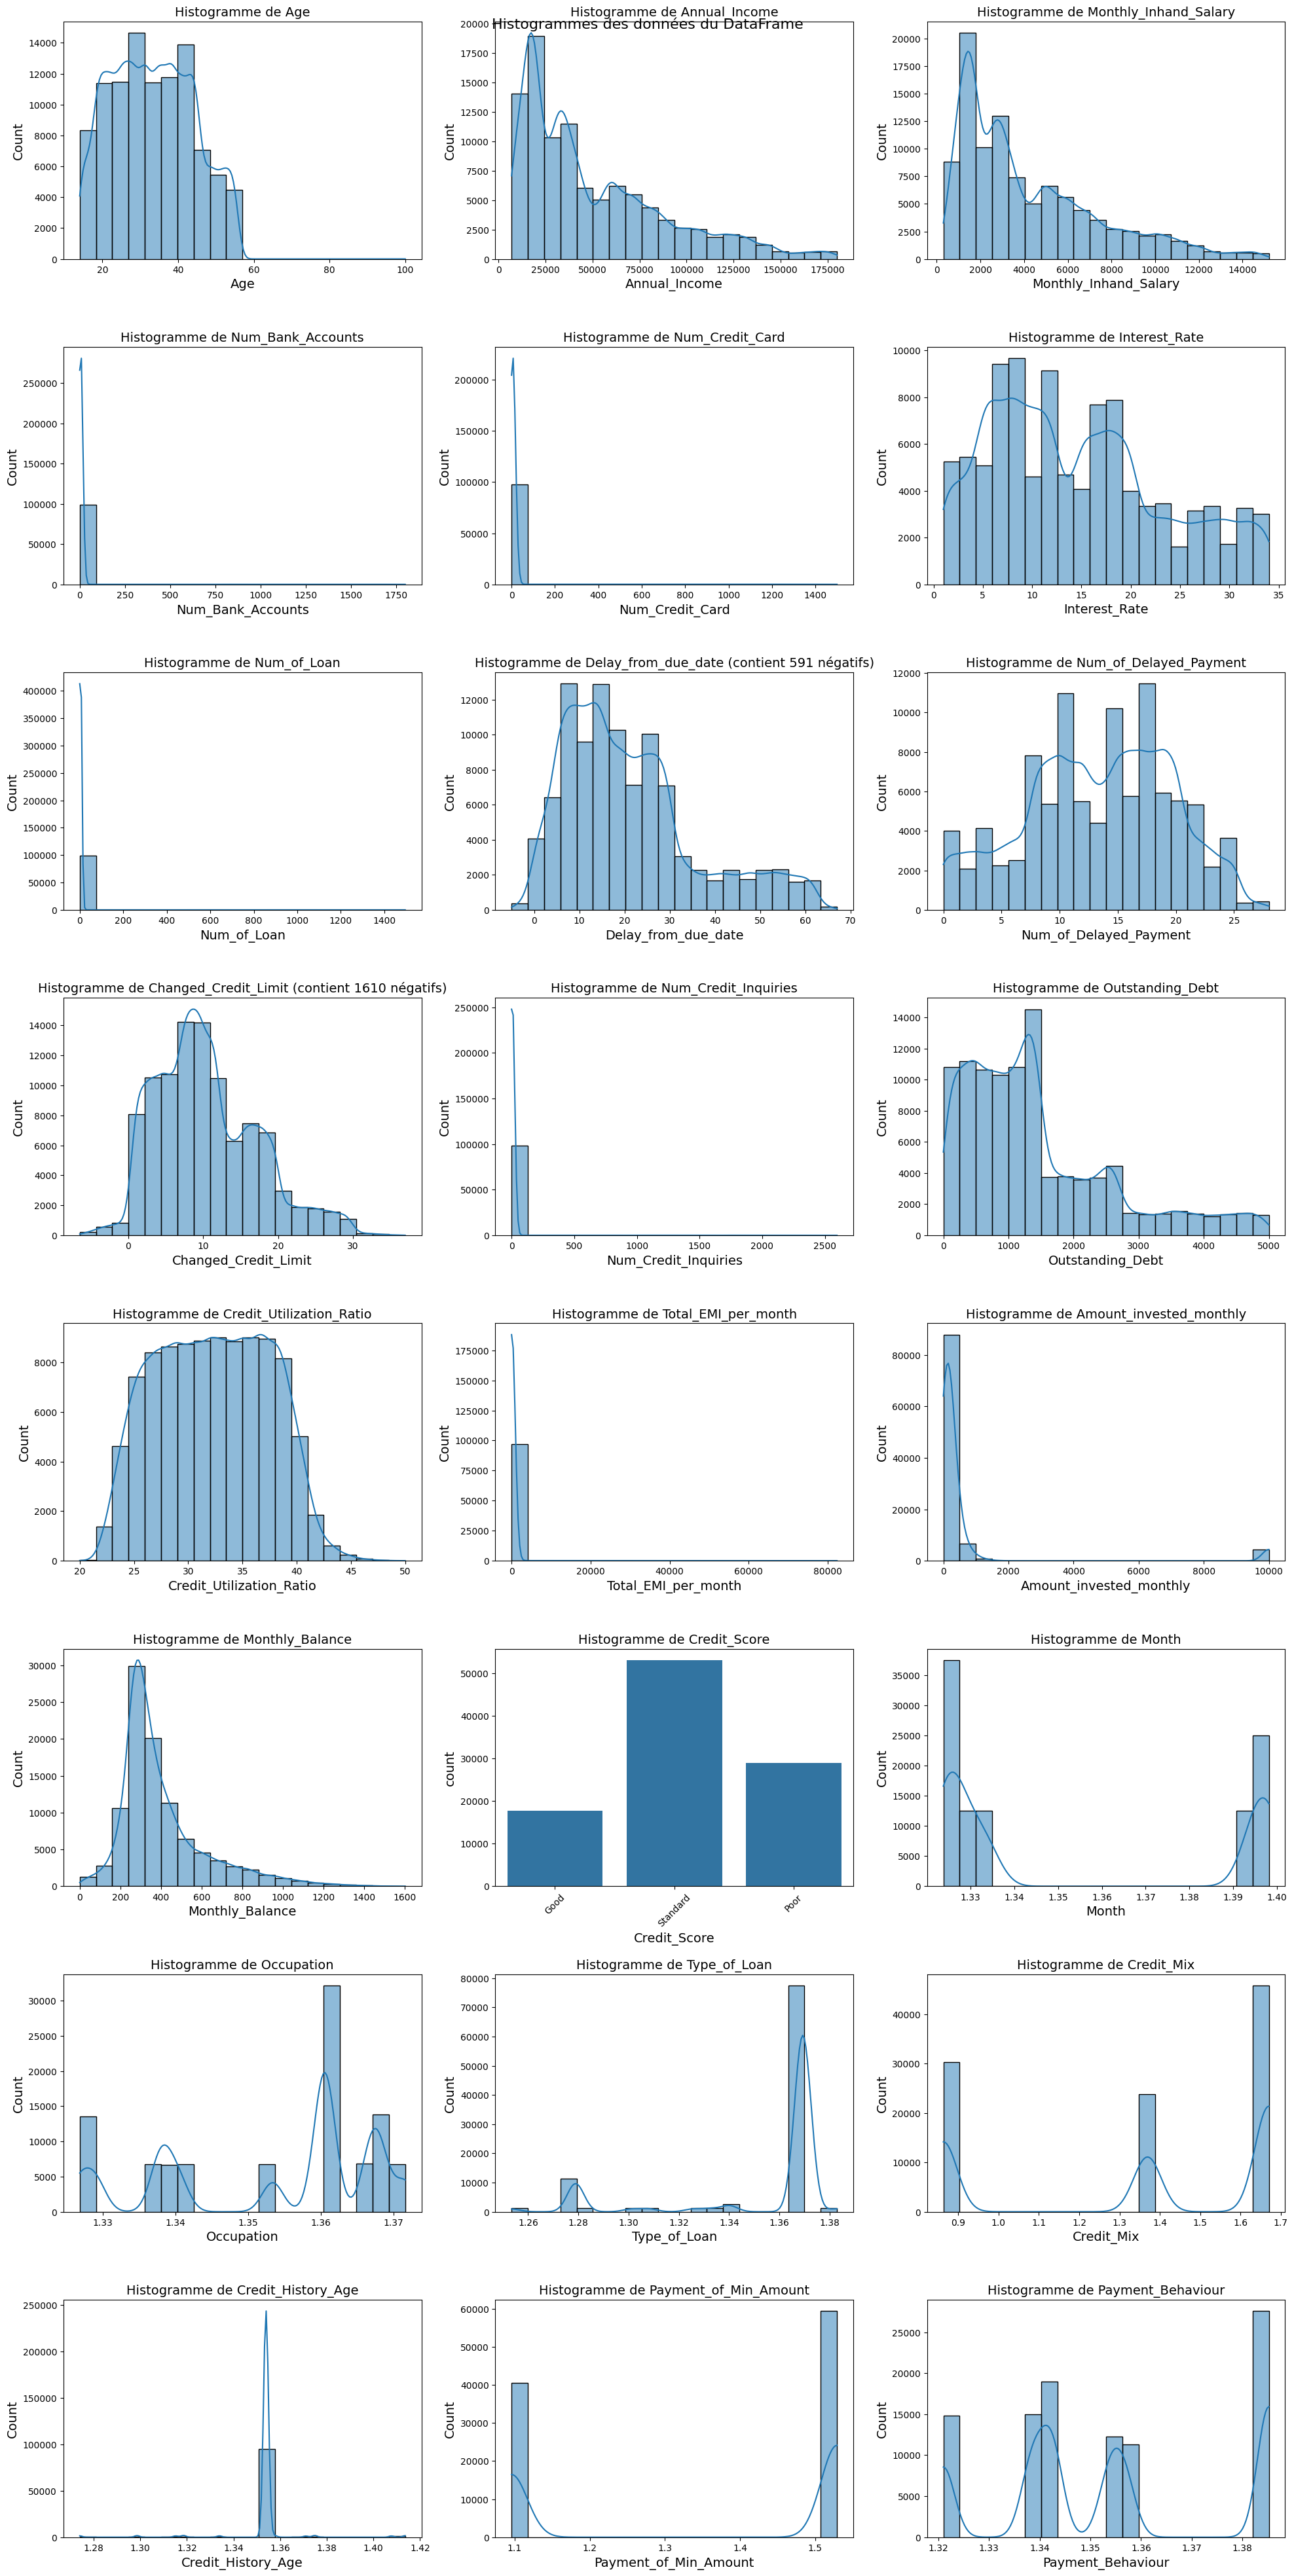

In [32]:

#Affichage des données après le prétraitement singulier

# Séparer les colonnes numériques et non numériques
colonnes_numeriques = df.select_dtypes(include=['number']).columns
colonnes_categoriques = df.select_dtypes(exclude=['number']).columns

# Fusionner toutes les colonnes pour l'affichage
colonnes = df.columns
num_colonnes = len(colonnes)

if num_colonnes == 0:
    print("Aucune colonne à afficher.")
else:
    # Configurer la disposition de la grille
    cols = 3  # Nombre de colonnes par ligne
    rows = (num_colonnes // cols) + (num_colonnes % cols > 0)
    
    # Créer les sous-graphiques
    fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 5))
    axes = axes.flatten()
    
    for idx, colonne in enumerate(colonnes):
        # Initialiser le titre pour la colonne
        title_text = f"Histogramme de {colonne}"
        if colonne in colonnes_numeriques:
            # Vérifier si la colonne contient des valeurs négatives
            if (df[colonne] < 0).any():
                negative_count = (df[colonne] < 0).sum()
                title_text += f" (contient {negative_count} négatifs)"
            # Afficher l'histogramme pour les données numériques
            sns.histplot(df[colonne], bins=20, kde=True, ax=axes[idx])
        else:
            # Pour les colonnes non numériques, afficher un countplot
            sns.countplot(x=df[colonne], ax=axes[idx])
            axes[idx].tick_params(axis='x', rotation=45)  # Pour une meilleure lisibilité des labels
        axes[idx].set_title(title_text)
    
    # Supprimer les sous-graphiques inutilisés
    for idx in range(num_colonnes, len(axes)):
        fig.delaxes(axes[idx])
    
    # Ajouter un titre global et ajuster les espacements
    fig.suptitle("Histogrammes des données du DataFrame", fontsize=16)
    plt.tight_layout()
    plt.show()

....................Matrice de corélation
                               Age  Annual_Income  Monthly_Inhand_Salary  \
Age                       1.000000       0.091437               0.090539   
Annual_Income             0.091437       1.000000               0.998201   
Monthly_Inhand_Salary     0.090539       0.998201               1.000000   
Num_Bank_Accounts        -0.000426      -0.008884              -0.008868   
Num_Credit_Card          -0.006764      -0.004992              -0.004928   
Interest_Rate            -0.217601      -0.302500              -0.302050   
Num_of_Loan              -0.012926      -0.013626              -0.013945   
Delay_from_due_date      -0.174191      -0.250295              -0.249685   
Num_of_Delayed_Payment   -0.183603      -0.285461              -0.284553   
Changed_Credit_Limit     -0.156320      -0.175264              -0.175205   
Num_Credit_Inquiries     -0.004887      -0.008853              -0.008866   
Outstanding_Debt         -0.202430      -0.269

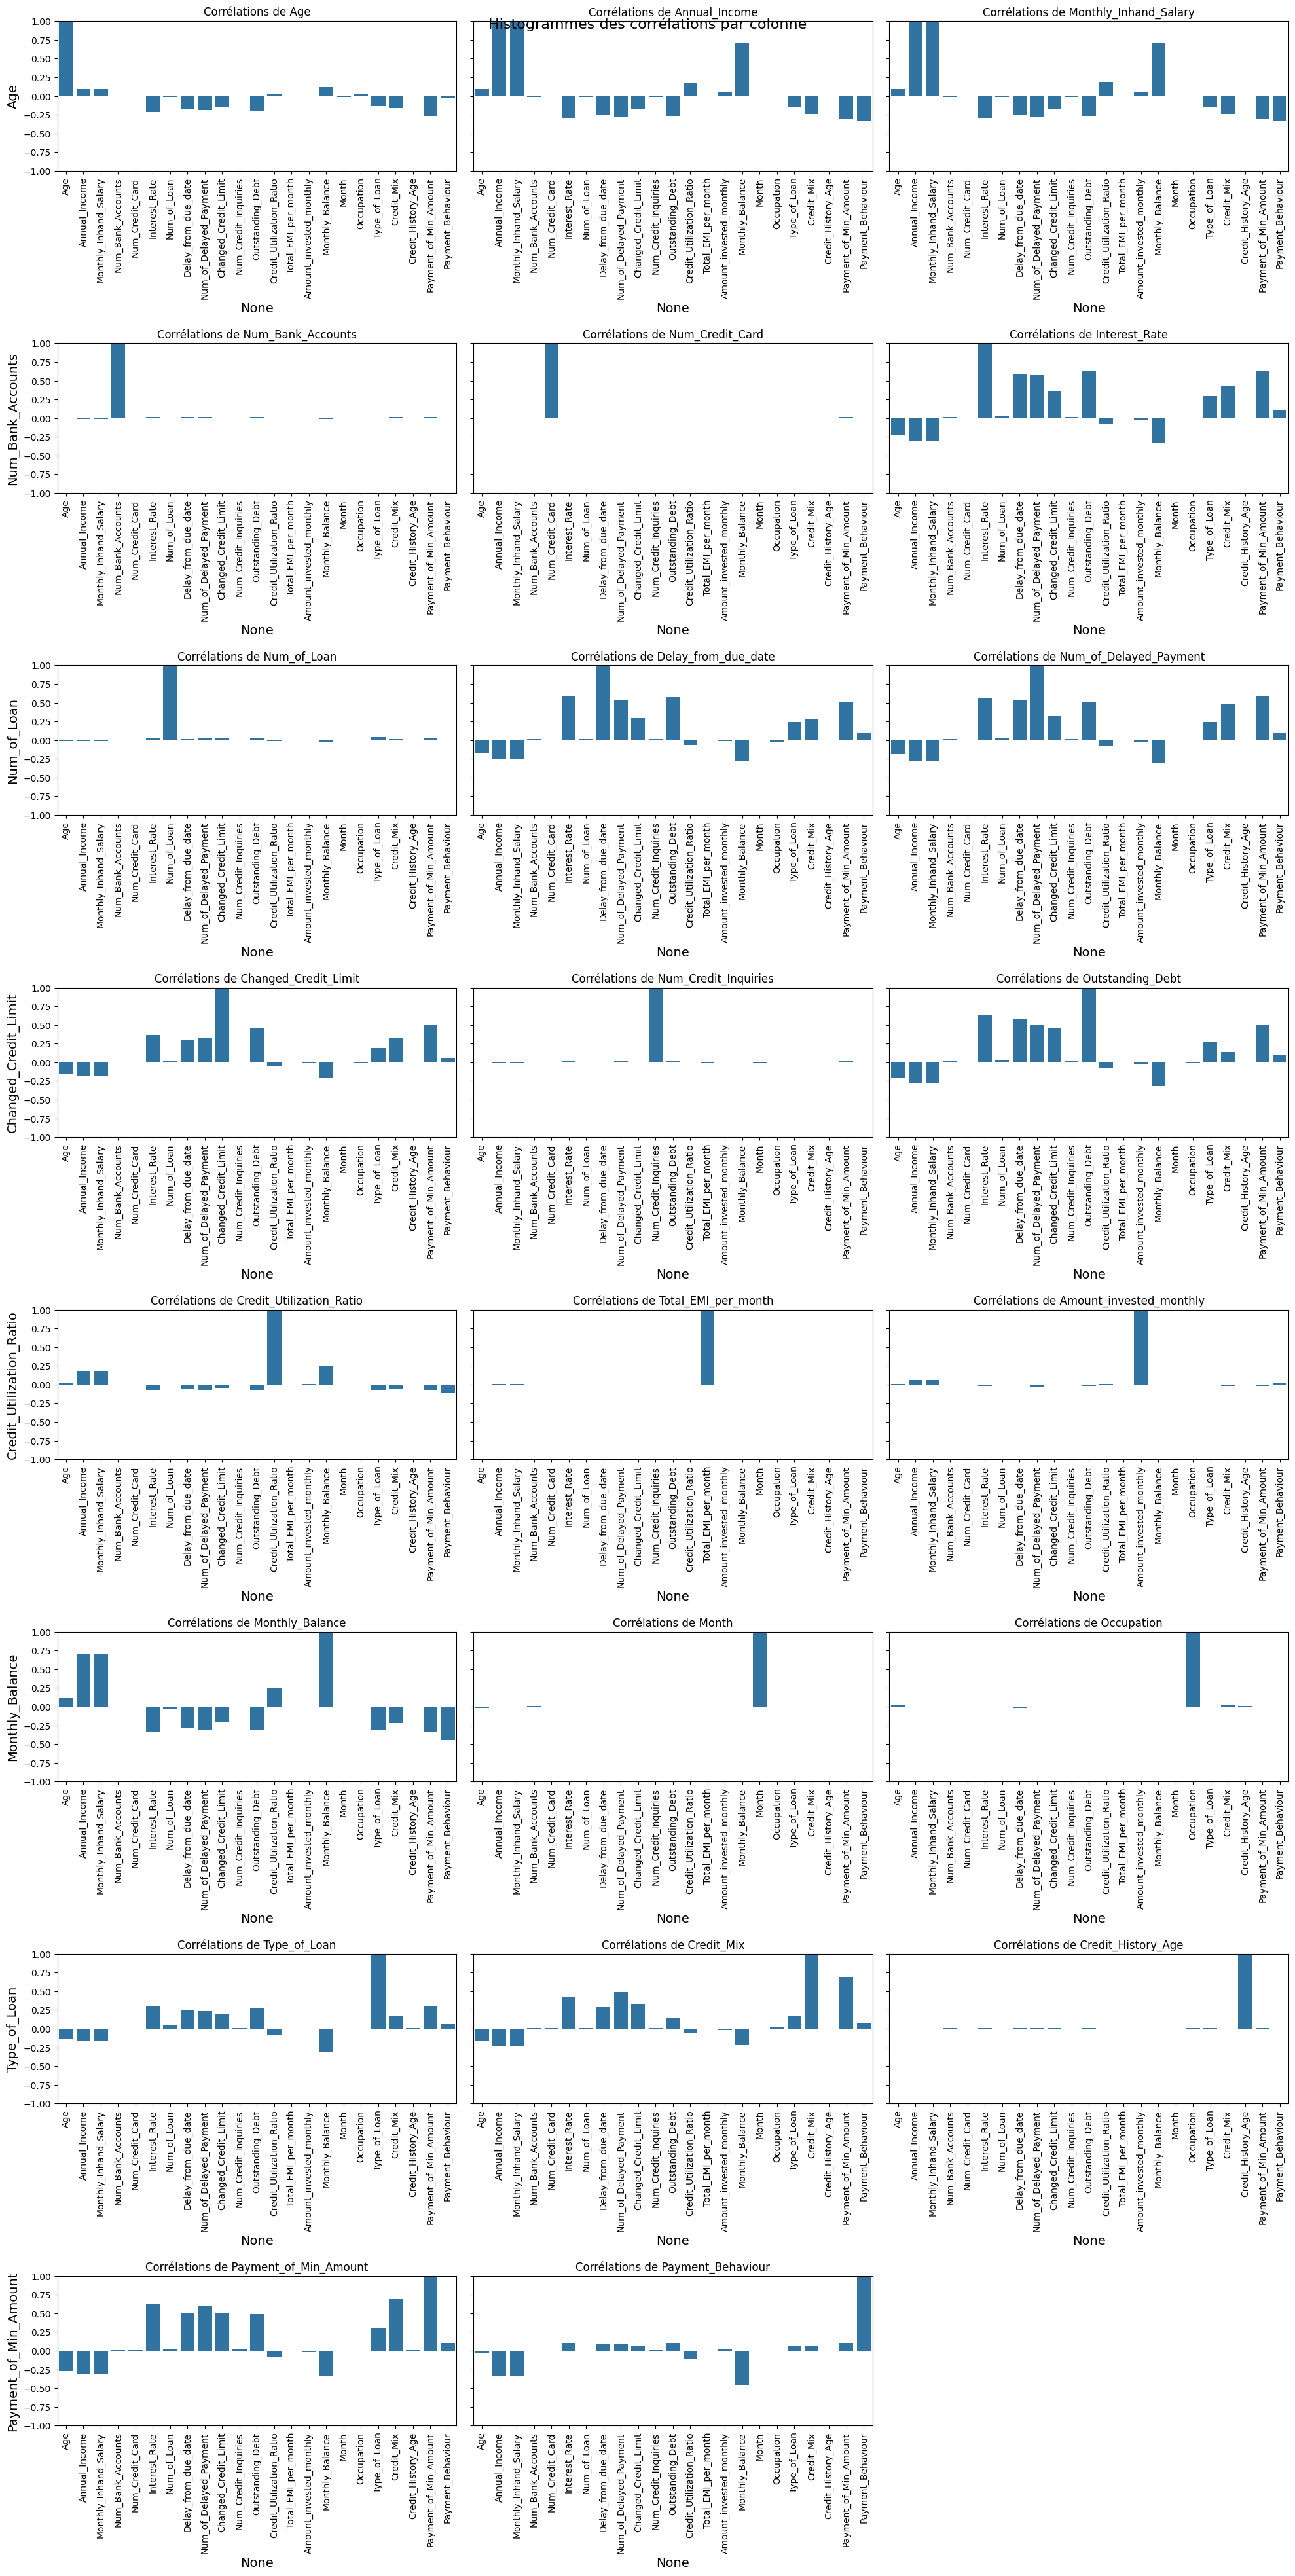

In [33]:
#Afficher la matrice de corrélation a partir du DataFrame

print("....................Matrice de corélation")

matrice_correlation = df.corr(numeric_only=True)
print(matrice_correlation)

# Déterminer le nombre de colonnes de la matrice
num_colonnes = len(matrice_correlation.columns)

# Configurer la disposition de la grille
cols = 3  # Nombre de colonnes par ligne
rows = (num_colonnes//cols) + (num_colonnes%cols > 0)  # Calculer le nombre de lignes nécessaires

# Créer les sous-graphiques
fig, axes = plt.subplots(rows, cols, figsize=(20, rows*5), sharey=True)  # Taille ajustée
axes = axes.flatten()  # Aplatir pour parcourir facilement les axes

# Tracer chaque histogramme avec Seaborn
for idx, colonne in enumerate(matrice_correlation.columns):
    sns.barplot(
        x = matrice_correlation.columns,
        y = matrice_correlation[colonne],
        ax = axes[idx]
    )
    axes[idx].set_title(f"Corrélations de {colonne}", fontsize=12)
    axes[idx].set_ylim(-1, 1)  # Limiter l'échelle entre -1 et 1
    axes[idx].tick_params(axis='x', rotation=90)  # Tourner les étiquettes pour une meilleure lisibilité

# Supprimer les sous-graphiques inutilisés si la grille contient plus de cellules que de graphes
for idx in range(num_colonnes, len(axes)):
    fig.delaxes(axes[idx])

# Ajouter un titre global et ajuster les espacements
fig.suptitle("Histogrammes des corrélations par colonne", fontsize=16)
plt.tight_layout()
plt.show()




In [34]:

# Identifier les colonnes corrélées (corrélation >= 0.9)
correlation = False
nbCorrelation = 1
colonne_a_conserver = list(df.columns)  # Liste des colonnes à conserver
colonne_correle = []
nbColonne = df.shape
df_correle = pd.DataFrame()  # Initialiser un DataFrame vide


for colonne in matrice_correlation.columns:
    for autre_colonne in matrice_correlation.columns:
        # Vérification des colonnes corrélées
        if colonne != autre_colonne and abs(matrice_correlation.loc[colonne, autre_colonne]) > 0.9:
            if str(autre_colonne) in colonne_a_conserver:  # Assurez-vous que autre_colonne est une chaîne de caractères
                correlation = True
                nbCorrelation += 1
                colonne_a_conserver.remove(autre_colonne)
                if autre_colonne in df.columns :
                    df.drop(columns = [str(autre_colonne)], inplace=True)  # Supprime les colonnes corrélées
 
    # Si une corrélation est trouvée, multiplier les valeurs de la colonne par 2
    if correlation:
        if colonne in df.columns :
            colonne_correle.append(colonne)
            df_correle = pd.concat([df_correle, df[colonne]*nbCorrelation], axis=1)  # Multiplier les valeurs de la colonne par le nombre de correlation
            print ("colonne corrélée: ", colonne)
            
    correlation = False  # Réinitialiser le flag après chaque colonne

df_correle.columns = colonne_correle # Assigner les noms des colonnes d'origine
df = pd.concat([df, df_correle], axis=1) 
print(df.head)

print(f"Taille avant la suppression des colonnes: {nbColonne}\nNouvelle taille : {df.shape}")

colonne corrélée:  Annual_Income
<bound method NDFrame.head of         Age  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  Num_of_Loan  \
0      23.0                3.0                4            3.0          4.0   
1      23.0                3.0                4            3.0          4.0   
2      23.0                3.0                4            3.0          4.0   
3      23.0                3.0                4            3.0          4.0   
4      23.0                3.0                4            3.0          4.0   
...     ...                ...              ...            ...          ...   
99995  25.0                4.0                6            7.0          2.0   
99996  25.0                4.0                6            7.0          2.0   
99997  25.0                4.0                6            7.0          2.0   
99998  25.0                4.0                6            7.0          2.0   
99999  25.0                4.0                6            7.0      

In [35]:
#Processaus de normalisation 


# Sélection des colonnes numériques

numeric_cols = df.select_dtypes(include=['float64', 'int64'])  


# Calcul des moyennes et des écarts-types pour chaque colonne
stats = pd.DataFrame({
    'Mean': numeric_cols.mean(),
    'Standard Deviation': numeric_cols.std()
})

print("Moyennes et écarts-types des colonnes :\n", stats)


Moyennes et écarts-types des colonnes :
                                    Mean  Standard Deviation
Age                           33.312127           10.774189
Num_Bank_Accounts             17.080271          117.364419
Num_Credit_Card               22.471227          129.017635
Interest_Rate                 14.535377            8.742411
Num_of_Loan                    6.722595           56.350305
Delay_from_due_date           21.073636           14.862241
Num_of_Delayed_Payment        13.335291            6.271477
Num_Credit_Inquiries          27.701802          192.901700
Credit_Utilization_Ratio      32.284970            5.117025
Total_EMI_per_month         1402.603045         8304.180306
Amount_invested_monthly      637.728666         2043.510567
Monthly_Balance              403.056243          213.982123
Month                          1.353463            0.033545
Occupation                     1.353463            0.014521
Type_of_Loan                   1.353463            0.033120

In [36]:
#Filtrage des colonnes

statsFiltrer = stats[(stats['Mean'] > 1) | (stats['Standard Deviation'] > 1)].index.tolist()
# Résultat
print("Colonnes avec moyenne ou écart-type supérieur à 1 :")
print(statsFiltrer)

#Normalisation

df_a_normaliser=df[statsFiltrer]

df_normalizer = df_a_normaliser.apply(lambda x: (x-x.min()) / (x.max()-x.min())
                                      if x.dtype != 'object' else x)

print("\nListe de colonnes normalisé :", df_normalizer)

df.drop(columns = statsFiltrer, inplace = True)

df = pd.concat([df, df_normalizer], axis=1)

print ("\ndataframe avec colonnes normaliser : \n", df.head)


Colonnes avec moyenne ou écart-type supérieur à 1 :
['Age', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance', 'Month', 'Occupation', 'Type_of_Loan', 'Credit_Mix', 'Credit_History_Age', 'Payment_of_Min_Amount', 'Payment_Behaviour', 'Annual_Income']

Liste de colonnes normalisé :             Age  Num_Bank_Accounts  Num_Credit_Card  Interest_Rate  \
0      0.104651           0.001669         0.002668       0.060606   
1      0.104651           0.001669         0.002668       0.060606   
2      0.104651           0.001669         0.002668       0.060606   
3      0.104651           0.001669         0.002668       0.060606   
4      0.104651           0.001669         0.002668       0.060606   
...         ...                ...              ...            ...   
99995  0.127907           0.002225     

#Étape 3:Préparation du jeux de test et du jeux d'entrainement

In [37]:
inputs = df.drop(columns=['Credit_Score'])
output = df['Credit_Score']

inputs = inputs.to_numpy()
output = output.to_numpy()

print(f"Shape des inputs : {inputs.shape}")
print(f"Shape des output : {output.shape}")

X_train, X_test, y_train, y_test = train_test_split(
    inputs, 
    output, 
    test_size = 0.33, random_state = 38
)

print(f"X_train: {X_train.shape}, X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}, y_test: {y_test.shape}")

Shape des inputs : (99937, 22)
Shape des output : (99937,)
X_train: (66957, 22), X_test: (32980, 22)
y_train: (66957,), y_test: (32980,)


#Étape 4 et 5 :Entrainnement et test du modèle sur l'ensemble des données

Meilleurs hyperparamètres : {'var_smoothing': 1e-08}

Accuracy optimisée : 0.6507883565797453


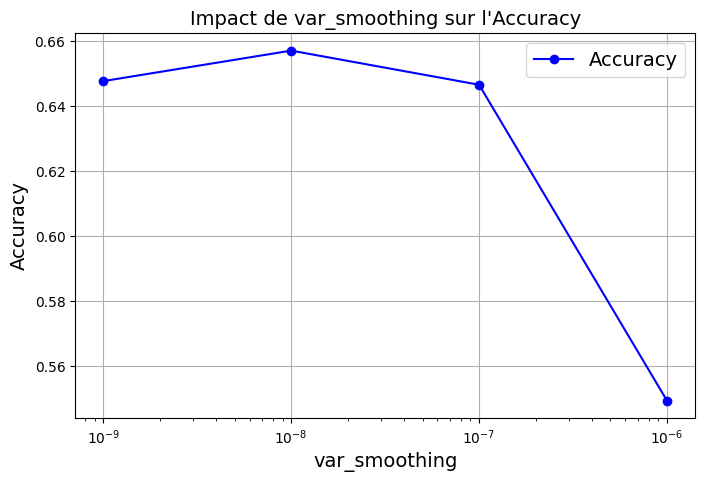


Classification Report :
               precision    recall  f1-score   support

        Good     0.4758    0.8329    0.6056      5908
        Poor     0.6254    0.7052    0.6629      9629
    Standard     0.8278    0.5591    0.6674     17443

    accuracy                         0.6508     32980
   macro avg     0.6430    0.6991    0.6453     32980
weighted avg     0.7057    0.6508    0.6550     32980



In [ ]:

from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB

# Définition des hyperparamètres à tester
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6]}

# Initialisation du modèle
nb = GaussianNB()

# Recherche des meilleurs hyperparamètres
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Meilleur modèle
best_nb = grid_search.best_estimator_

# Prédictions avec le modèle optimisé
predictions = best_nb.predict(X_test)

# Affichage des meilleurs paramètres
print("Meilleurs hyperparamètres :", grid_search.best_params_)
print("\nAccuracy optimisée :", np.mean(predictions == y_test))

# Création du graphique des variations de l'accuracy
accuracies = grid_search.cv_results_['mean_test_score']
var_smoothing_values = param_grid['var_smoothing']

plt.figure(figsize=(8, 5))
plt.plot(var_smoothing_values, accuracies, marker="o", linestyle="-", color="b", label="Accuracy")
plt.xscale("log")  # Échelle logarithmique pour une meilleure visualisation
plt.xlabel("var_smoothing")
plt.ylabel("Accuracy")
plt.title("Impact de var_smoothing sur l'Accuracy")
plt.legend()
plt.grid()
plt.show()

#Etape 6: Mesure de la performance du modèle

Matrice de confusion :
 [[4921  144  843]
 [1654 6790 1185]
 [3768 3923 9752]]


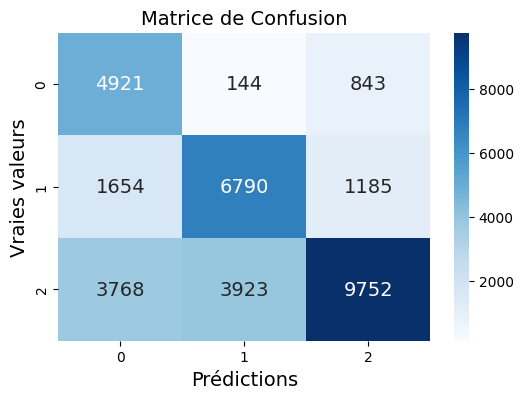


Classification Report :
               precision    recall  f1-score   support

        Good     0.4758    0.8329    0.6056      5908
        Poor     0.6254    0.7052    0.6629      9629
    Standard     0.8278    0.5591    0.6674     17443

    accuracy                         0.6508     32980
   macro avg     0.6430    0.6991    0.6453     32980
weighted avg     0.7057    0.6508    0.6550     32980



In [42]:
# Génération de la matrice de confusion
conf_matrix = confusion_matrix(y_test, predictions)
print("Matrice de confusion :\n", conf_matrix)

# Affichage sous forme de heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Prédictions")
plt.ylabel("Vraies valeurs")
plt.title("Matrice de Confusion")
plt.show()


# Affichage du rapport de classification
print("\nClassification Report :\n", classification_report(y_test, predictions, digits=4))


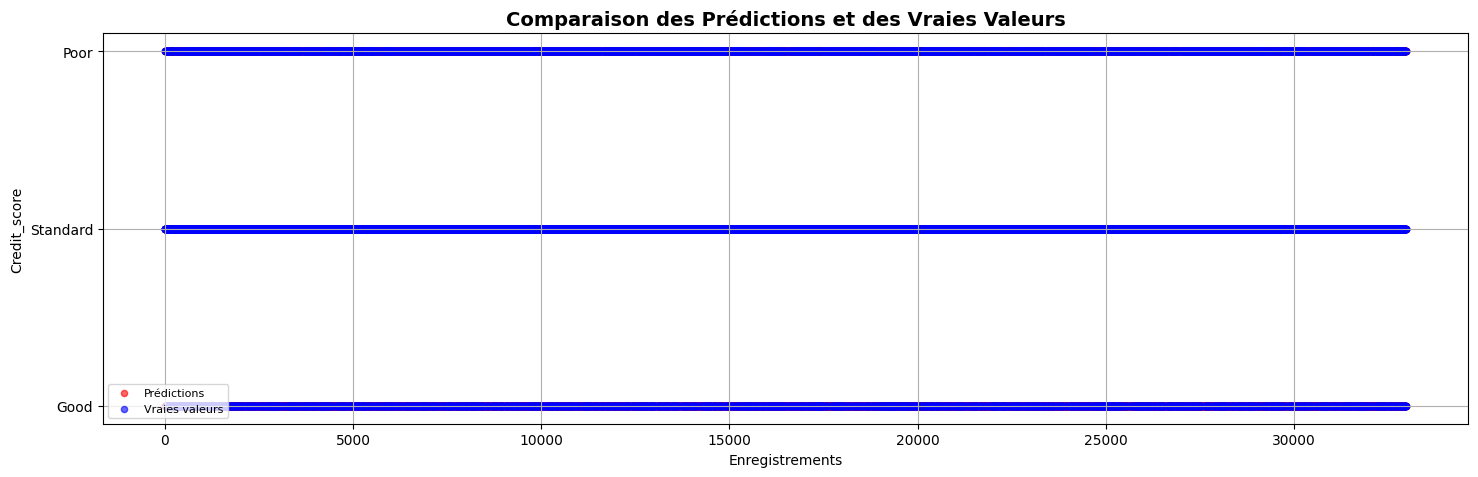

Précision du modèle : 0.6508


In [43]:
#Courbe
fig, ax = plt.subplots(figsize=(15, 5))  

ax.scatter(np.arange(len(predictions)), predictions, c='r', s=20, label='Prédictions', alpha=0.6)
ax.scatter(np.arange(len(y_test)), y_test, c='b', s=20, label='Vraies valeurs', alpha=0.6)
# Configuration du graphique
ax.set_xlabel('Enregistrements', fontsize=10)
ax.set_ylabel('Credit_score', fontsize=10)
ax.set_title("Comparaison des Prédictions et des Vraies Valeurs", fontsize=14, fontweight='bold')
ax.legend(fontsize=8)
ax.grid(True)

# Ajustement de l'affichage
plt.tight_layout()
plt.show()

#Valeur de la précision
report = classification_report(y_test, predictions, output_dict=True)
precision = report["accuracy"]  # Affiche la précision globale
print(f"Précision du modèle : {precision:.4f}")


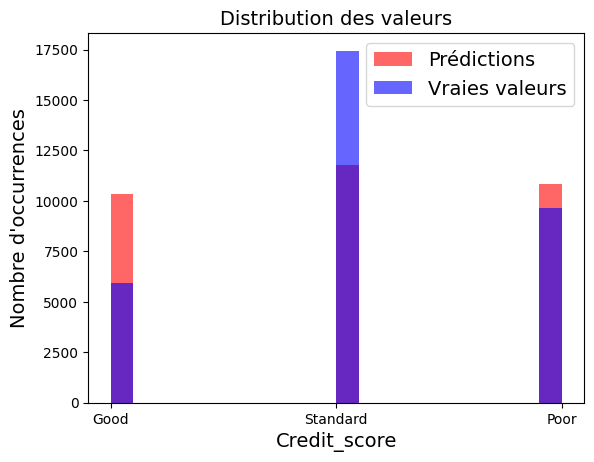

In [41]:
plt.hist(predictions, bins=20, alpha=0.6, color='r', label='Prédictions')
plt.hist(y_test, bins=20, alpha=0.6, color='b', label='Vraies valeurs')
plt.legend()
plt.xlabel("Credit_score")
plt.ylabel("Nombre d'occurrences")
plt.title("Distribution des valeurs")
plt.show()
